<a href="https://colab.research.google.com/github/WLAraujo/min_dados_ufabc/blob/main/03_codificacao_distancias_escalonamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distâncias, codificação e escalonamento multidimensional
Vamos ver exemplos do cálculo de distância que usa codificação e o uso de escalonamento multidimensional.

## 0 - Instalação de pacote de codificação 

In [1]:
# Pacote com vários métodos de codificação de variáveis categóricas para numéricas
!pip install category_encoders

     |████████████████████████████████| 82 kB 359 kB/s 


## 1 - Importação de bibliotecas e pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from category_encoders import OneHotEncoder, OrdinalEncoder
from scipy.spatial.distance import pdist, squareform

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2 - Sobre a base de dados

Vamos carregar uma base de dados no National Health and Examination Survey, uma pesquisa por amostragem feita pelo Centers of Disease Control and Preventions, uma agência dos EUA para monitoramento de saúde. Essa Base de dados é uma amostra de registros dos anos fiscais 2009/10 e 2011/12.

In [4]:
# Importação dos dados
NHANES = pd.read_csv('https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv',index_col='ID')

In [5]:
# Amostra aleatória
NHANES.sample(10)

,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70008,2011_12,female,55,50-59,NaN,White,White,CollegeGrad,Divorced,45000-54999,50000.0,2.04,13.0,Own,Looking,71.7,NaN,NaN,166.1,26.00,NaN,25.0_to_29.9,72.0,112.0,74.0,114.0,74.0,110.0,74.0,114.0,74.0,27.35,1.40,6.26,145.0,1.043,NaN,NaN,No,NaN,Vgood,0.0,2.0,None,None,5.0,2.0,30.0,7.0,No,Yes,5.0,1_hr,0_to_1_hr,NaN,NaN,Yes,1.0,12.0,NaN,No,Non-Smoker,NaN,Yes,18.0,No,NaN,Yes,Yes,19.0,16.0,0.0,No,Heterosexual
61478,2009_10,male,48,40-49,585.0,White,NaN,CollegeGrad,Married,55000-64999,60000.0,2.13,8.0,Own,Working,78.5,NaN,NaN,185.4,22.84,NaN,18.5_to_24.9,72.0,118.0,81.0,120.0,80.0,118.0,78.0,118.0,84.0,NaN,1.97,5.38,232.0,3.463,NaN,NaN,No,NaN,Excellent,0.0,0.0,None,None,NaN,NaN,NaN,7.0,No,No,NaN,NaN,NaN,NaN,NaN,Yes,2.0,364.0,NaN,No,Non-Smoker,NaN,Yes,19.0,No,NaN,No,Yes,25.0,4.0,1.0,No,Heterosexual
53773,2009_10,male,51,50-59,613.0,White,NaN,HighSchool,Married,10000-14999,12500.0,0.75,6.0,Own,NotWorking,137.1,NaN,NaN,172.8,45.91,NaN,30.0_plus,66.0,107.0,80.0,104.0,72.0,110.0,80.0,104.0,80.0,NaN,1.32,5.43,65.0,0.542,NaN,NaN,Yes,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Yes,Yes,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Smoker,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57872,2009_10,female,25,20-29,304.0,Other,NaN,HighSchool,NeverMarried,75000-99999,87500.0,3.20,5.0,Own,NotWorking,46.9,NaN,NaN,158.3,18.72,NaN,18.5_to_24.9,80.0,95.0,59.0,102.0,56.0,96.0,58.0,94.0,60.0,NaN,1.37,4.16,39.0,0.267,NaN,NaN,No,NaN,Good,0.0,0.0,None,None,NaN,NaN,NaN,10.0,No,No,NaN,NaN,NaN,NaN,NaN,Yes,1.0,52.0,NaN,No,Non-Smoker,NaN,No,NaN,No,NaN,No,Yes,16.0,21.0,2.0,No,Heterosexual
52587,2009_10,female,72,70+,873.0,Black,NaN,HighSchool,NeverMarried,5000-9999,7500.0,0.92,6.0,Own,NotWorking,73.0,NaN,NaN,163.8,27.21,NaN,25.0_to_29.9,72.0,118.0,48.0,124.0,46.0,122.0,44.0,114.0,52.0,NaN,2.09,6.03,52.0,0.839,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Smoker,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56216,2009_10,female,50,50-59,603.0,Other,NaN,CollegeGrad,Married,NaN,NaN,NaN,6.0,Own,NotWorking,67.0,NaN,NaN,171.7,22.73,NaN,18.5_to_24.9,70.0,117.0,60.0,114.0,62.0,118.0,66.0,116.0,54.0,NaN,NaN,NaN,48.0,1.200,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,No,Yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64517,2011_12,female,4,0-9,NaN,White,White,NaN,NaN,45000-54999,50000.0,3.57,6.0,Own,NaN,17.5,NaN,NaN,105.9,15.60,b_NormWeight,12.0_18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1_hr,0_to_1_hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58179,2009_10,female,12,10-19,144.0,White,NaN,NaN,NaN,25000-34999,30000.0,1.12,10.0,Own,NaN,42.9,NaN,NaN,159.2,16.93,NaN,12.0_18.5,80.0,103.0,61.0,104.0,60.0,108.0,56.0,98.0,66.0,NaN,1.63,3.96,336.0,1.714,NaN,NaN,No,NaN,Vgood,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62631,2011_12,female,37,30-39,NaN,White,White,SomeCollege,Married,25000-34999,30000.0,1.28,6.0,Own,NotWorking,66.7,NaN,NaN,167.4,23.80,NaN,18.5_to_

In [6]:
# Informações sobre os atributos
NHANES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 55829 to 62881
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SurveyYr          10000 non-null  object 
 1   Gender            10000 non-null  object 
 2   Age               10000 non-null  int64  
 3   AgeDecade         9667 non-null   object 
 4   AgeMonths         4962 non-null   float64
 5   Race1             10000 non-null  object 
 6   Race3             5000 non-null   object 
 7   Education         7221 non-null   object 
 8   MaritalStatus     7231 non-null   object 
 9   HHIncome          9189 non-null   object 
 10  HHIncomeMid       9189 non-null   float64
 11  Poverty           9274 non-null   float64
 12  HomeRooms         9931 non-null   float64
 13  HomeOwn           9937 non-null   object 
 14  Work              7771 non-null   object 
 15  Weight            9922 non-null   float64
 16  Length            543 non-null    fl

In [7]:
# Descrição estatística para colunas com valores numéricos
NHANES.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,36.742100,22.397566,0.00,17.000,36.000,54.000,80.000
AgeMonths,4962.0,420.123942,259.043091,0.00,199.000,418.000,624.000,959.000
HHIncomeMid,9189.0,57206.170421,33020.276584,2500.00,30000.000,50000.000,87500.000,100000.000
Poverty,9274.0,2.801844,1.677909,0.00,1.240,2.700,4.710,5.000
HomeRooms,9931.0,6.248918,2.277538,1.00,5.000,6.000,8.000,13.000
Weight,9922.0,70.981798,29.125357,2.80,56.100,72.700,88.900,230.700
Length,543.0,85.016022,13.705026,47.10,75.700,87.000,96.100,112.200
HeadCirc,88.0,41.180682,2.311483,34.20,39.575,41.450,42.925,45.400
Height,9647.0,161.877838,20.186567,83.60,156.800,166.000,174.500,200.400
BMI,9634.0,26.660136,7.376579,12.88,21.580,25.980,30.890,81.250


In [8]:
# Descrição estatística para colunas com valores categóricos
NHANES.describe(include = 'object').T

,count,unique,top,freq
SurveyYr,10000,2,2009_10,5000
Gender,10000,2,female,5020
AgeDecade,9667,8,40-49,1398
Race1,10000,5,White,6372
Race3,5000,6,White,3135
Education,7221,5,SomeCollege,2267
MaritalStatus,7231,6,Married,3945
HHIncome,9189,12,more 99999,2220
HomeOwn,9937,3,Own,6425
Work,7771,3,Working,4613


## 3 - Codificação dos valores categóricos

In [10]:
# Vamos ver todos os valores possíveis das colunas categóricas do nosso dataset
for nome_coluna in NHANES.select_dtypes(include=["object_"]):
  print(f'{nome_coluna} "->" {NHANES[nome_coluna].unique()}\n')

SurveyYr "->" ['2009_10' '2011_12']

Gender "->" ['female' 'male']

AgeDecade "->" [' 20-29' ' 10-19' nan ' 0-9' ' 30-39' ' 60-69' ' 70+' ' 40-49' ' 50-59']

Race1 "->" ['White' 'Other' 'Mexican' 'Hispanic' 'Black']

Race3 "->" [nan 'Black' 'White' 'Mexican' 'Other' 'Hispanic' 'Asian']

Education "->" ['CollegeGrad' nan '8thGrade' 'HighSchool' 'SomeCollege' '9_11thGrade']

MaritalStatus "->" ['Married' nan 'NeverMarried' 'Divorced' 'Widowed' 'LivePartner'
 'Separated']

HHIncome "->" ['more 99999' '75000-99999' '20000-24999' '45000-54999' '25000-34999'
 '15000-19999' '10000-14999' '65000-74999' nan '35000-44999' ' 5000-9999'
 '55000-64999' ' 0-4999']

HomeOwn "->" ['Own' 'Rent' nan 'Other']

Work "->" ['Working' nan 'NotWorking' 'Looking']

BMICatUnder20yrs "->" [nan 'b_NormWeight' 'd_Obese' 'c_OverWeight' 'a_UnderWeight']

BMI_WHO "->" ['18.5_to_24.9' '30.0_plus' nan '25.0_to_29.9' '12.0_18.5']

Diabetes "->" ['No' 'Yes' nan]

HealthGen "->" ['Vgood' 'Excellent' 'Poor' 'Good' nan 'Fai

In [14]:
# Criando listas que separam valores categóricos ordinais e não ordinais
categorico =  ['SurveyYr', 'Gender', 'Race1', 'Race3', 'MaritalStatus', 
                'HomeOwn', 'Work', 'Diabetes', 'SleepTrouble', 'PhysActive',
                'Alcohol12PlusYr', 'SmokeNow', 'Smoke100', 'Smoke100n',
                'Marijuana', 'RegularMarij', 'HardDrugs', 'SexEver', 'SameSex',
                'SexOrientation']
ordinal = ['AgeDecade', 'Education', 'HHIncome', 'BMICatUnder20yrs', 'BMI_WHO',
           'HealthGen', 'LittleInterest', 'Depressed', 'TVHrsDay', 'CompHrsDay']

In [15]:
# Criando lista de dicionários no formato necessário para usar a biblioteca de codificação
# O que estamos fazendo é criar dicionários que atribuem valores numéricos para as variáveis ordinais
mappings = [
    {'col' : 'AgeDecade',
     'mapping' : {
         ' 0-9' : 0,
         ' 10-19' : 1,
         ' 20-29' : 2,
         ' 30-39' : 3,
         ' 40-40' : 4,
         ' 50-59' : 5,
         ' 60-69' : 6,
         ' 70+' : 7
     }
    },
    {'col' : 'Education',
     'mapping' : {
          '8thGrade' : 0,
          '9_11thGrade': 1,
          'HighSchool' : 2,
          'SomeCollege' : 3,
          'CollegeGrad' : 4
     }   
    },
    {'col' : 'HHIncome',
     'mapping' : {
         ' 0-4999' : 0,
         ' 5000-9999' : 1,
         '10000-14999' : 2,
         '15000-19999' : 3,
         '20000-24999' : 4,
         '25000-34999' : 5,
         '25000-44999' : 6,
         '45000-54999' : 7,
         '55000-64999' : 8,
         '65000-74999' : 9,
         '75000-99999' : 10,
         'more 99999'  : 11
     }
    },
    {'col': 'BMICatUnder20yrs',
     'mapping' : {
         'a_UnderWeight' : 0,
         'b_NormWeight'  : 1,
         'c_OverWeight'  : 2,
         'd_Obese'       : 3
     }
    },
    {'col':'BMI_WHO',
     'mapping': {
        '12.0_18.5'    : 0,
        '18.5_to_24.9' : 1,
        '25.0_to_29.9' : 2,
        '30.0_plus'    : 3
     }
    },
    {'col' : 'HealthGen',
     'mapping' : {
         'Poor'      : 0,
         'Fair'      : 1,
         'Good'      : 2, 
         'Vgood'     : 3, 
         'Excellent' : 4
     }
    },
    {'col' : 'LittleInterest',
     'mapping' : {
         'None'    : 0, 
         'Most'    : 1, 
         'Several' : 2
     }
    },
    {'col' : 'Depressed',
     'mapping' : {
         'None'    : 0, 
         'Most'    : 1, 
         'Several' : 2
     }
    },
    {'col' : 'TVHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }        
    },
    {'col' : 'CompHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }
    }        
]

In [17]:
# Aplicando funções de codificação
# Para variáveis não ordinais o OneHotEncoding e para as ordinais o OrdinalEncoding
onehotenc = OneHotEncoder(cols = categorico)
ordinalenc = OrdinalEncoder(cols = ordinal)

Lembrando que o one hot encoding cria uma coluna para cada possível categoria e atribui valor 1 na coluna somente se o valor do atributo naquela linha é aquele representado pela coluna.

In [18]:
# Aplicando o enconding não ordinal no dataframe original através da função fit do scikit-learn
NHANES1 = onehotenc.fit_transform(NHANES)

In [19]:
# Verificando nova estrutura de tabela
NHANES1.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,20-29,343.0,1,0,0,0,0,1,0,0,0,0,0,0,CollegeGrad,1,0,0,0,0,0,0,more 99999,100000.0,5.00,5.0,1,0,0,0,1,0,0,0,61.0,...,NaN,1,0,0,3.0,72.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,15.0,1,0,0,NaN,1,0,0,1,0,0,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,10-19,170.0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,75000-99999,87500.0,4.17,4.0,1,0,0,0,0,1,0,0,88.9,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
60232,1,0,0,1,80,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,8thGrade,1,0,0,0,0,0,0,20000-24999,22500.0,1.58,6.0,1,0,0,0,0,0,1,0,NaN,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
59919,1,0,0,1,22,20-29,268.0,1,0,0,0,0,1,0,0,0,0,0,0,HighSchool,0,0,1,0,0,0,0,45000-54999,50000.0,1.85,7.0,0,1,0,0,1,0,0,0,65.8,...,NaN,1,0,0,4.0,156.0,0,1,0,0,0,1,0,0,1,9.0,1,0,0,10.0,0,0,1,10.0,1,0,0,1,0,0,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,0-9,16.0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,25000-34999,30000.0,1.45,7.0,1,0,0,0,0,1,0,0,9.8,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0


In [20]:
# Agora, também vamos aplicar o encoding nos atributos ordinais 
# Para fazer isso vamos substituindo os seus valores pelos números definidos no mapping
NHANES2 = ordinalenc.fit_transform(NHANES1, mapping = mappings)

In [21]:
# Verificando nova estrutura de tabela
NHANES2.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,1,343.0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,100000.0,5.00,5.0,1,0,0,0,1,0,0,0,61.0,...,NaN,1,0,0,3.0,72.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,15.0,1,0,0,NaN,1,0,0,1,0,0,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,2,170.0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,2,87500.0,4.17,4.0,1,0,0,0,0,1,0,0,88.9,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
60232,1,0,0,1,80,3,NaN,1,0,0,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,3,22500.0,1.58,6.0,1,0,0,0,0,0,1,0,NaN,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
59919,1,0,0,1,22,1,268.0,1,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0,0,0,0,4,50000.0,1.85,7.0,0,1,0,0,1,0,0,0,65.8,...,NaN,1,0,0,4.0,156.0,0,1,0,0,0,1,0,0,1,9.0,1,0,0,10.0,0,0,1,10.0,1,0,0,1,0,0,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,4,16.0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,5,30000.0,1.45,7.0,1,0,0,0,0,1,0,0,9.8,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0


## 4 - Normalizando e calculando as distâncias

In [22]:
# Não podemos calcular as distâncias enquanto ainda houver valores nulos
# Vamso substituir esses valores nulos pelas médias
NHANES3  = NHANES2.fillna(NHANES2.median())

In [26]:
# Para o processamento ficar mais rápido vamos usar amostragem
amostra = NHANES3.sample(1000)

In [27]:
# Normalização da coluna dos valores da tabelas
# Usamos a biblioteca pandas que já faz isso coluna a coluna
amostra = (amostra - amostra.min())/(amostra.max()-amostra.min())

In [28]:
# Verificando tabela
amostra.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59642,1.0,0.0,0.0,1.0,0.6125,0.875,0.627225,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.540,0.583333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.433824,...,0.166667,1.0,0.0,0.0,0.028571,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282051,1.0,0.0,0.0,0.294118,0.0,0.0,1.0,0.357143,1.0,0.0,0.0,1.0,0.0,0.0,0.121951,0.015,0.028986,1.0,0.0,0.0,1.0,0.0,0.0,0.0
66747,0.0,1.0,0.0,1.0,0.7375,1.000,0.437696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.916667,0.589744,0.794,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.738688,...,0.166667,1.0,0.0,0.0,0.200000,0.285714,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.256410,1.0,0.0,0.0,0.411765,0.0,0.0,1.0,0.714286,0.0,0.0,1.0,1.0,0.0,0.0,0.170732,0.020,0.014493,1.0,0.0,0.0,1.0,0.0,0.0,0.0
63788,0.0,1.0,1.0,0.0,0.5000,0.875,0.437696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.102564,0.184,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.252828,...,0.166667,1.0,0.0,0.0,0.028571,0.010989,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.256410,1.0,0.0,0.0,0.264706,1.0,0.0,0.0,0.321429,0.0,0.0,1.0,1.0,0.0,0.0,0.170732,0.004,0.014493,1.0,0.0,0.0,1.0,0.0,0.0,0.0
64675,0.0,1.0,0.0,1.0,0.5750,0.875,0.437696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.411199,...,0.166667,1.0,0.0,0.0,0.085714,0.032967,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.282051,0.0,0.0,1.0,0.294118,1.0,0.0,0.0,0.321429,0.0,0.0,1.0,1.0,0.0,0.0,0.146341,0.020,0.014493,1.0,0.0,0.0,1.0,0.0,0.0,0.0
65235,0.0,1.0,1.0,0.0,0.0625,0.375,0.437696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.871795,0.672,0.416667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.144796,...,0.166667,0.0,1.0,0.0,0.028571,0.065934,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.282051,0.0,1.0,0.0,0.294118,0.0,1.0,0.0,0.321429,0.0,1.0,0.0,0.0,1.0,0.0,0.195122,0.005,0.014493,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Abaixo estamos criando a matriz de distâncias da amostra
# A função pdist calcula a distância euclidiana de todas as linhas par a par
# A biblioteca scipy já tem mais de 10 métricas de distância, sendo euclidean uma delas
# Já o squareform é usada pois pdist calcula só metade dos valores, o squareform completa as matrizes
dist = squareform(pdist(amostra,'euclidean'))
dist

array([[0.        , 4.03000073, 5.07204754, ..., 4.85280167, 5.59688144,
        5.71269075],
       [4.03000073, 0.        , 4.01084656, ..., 4.08040889, 5.64140724,
        5.6924832 ],
       [5.07204754, 4.01084656, 0.        , ..., 5.25474281, 5.72464207,
        5.84610481],
       ...,
       [4.85280167, 4.08040889, 5.25474281, ..., 0.        , 5.37698294,
        5.32275129],
       [5.59688144, 5.64140724, 5.72464207, ..., 5.37698294, 0.        ,
        3.8061366 ],
       [5.71269075, 5.6924832 , 5.84610481, ..., 5.32275129, 3.8061366 ,
        0.        ]])

## 5 - Escalonamento multidimensional

O Escalonamento Multidimensional é uma técnica de interdependência que permite mapear distâncias entre objetos. É de fácil aplicação e também é apropriada para representar graficamente n elementos em um espaço de dimensão menor do que o original, levando-se em conta a distância ou a similaridade que os elementos têm entre si.

Um exemplo hipotético de aplicação do escalonamento: Suponha que temos um arquivo com cidades brasileiras mas sem a configuração geográfica, porém, temos a informação das distâncias entre cidades. Pela técnica é criado um novo sistema de coordenadas
que facilita a interpretação das proximidades das cidades.

O Stress de um Escalonamento Multidimensional é a diferença do espaço projetado para o espaço original.

Aqui vamos realizar o escalonamento multidimensional usando as métricas de distância euclidiana e cityblock.

In [32]:
# Criando objeto MDS (Multi Dimensional Scaling)
# O argumento de dissimilaridade está como precomputed pois já calculamos a matriz de distâncias
# A opção verboso é para acompanharmos a evolução dessa função
mds = MDS(dissimilarity='precomputed',verbose=2)

In [34]:
# É usado um método de otimização da função que é iterativo e é repetido 4 vezes
# A função fit tenta minimizar o stress do escalonamento
# A matriz resultante abaixo é uma tabela 1000 x 2 e representa o espaço projetado após o fit
escalonado = mds.fit_transform(dist)

it: 0, stress 10727864.14135115
it: 1, stress 2700824.5367719685
it: 2, stress 2657847.698078382
it: 3, stress 2627961.2641326496
it: 4, stress 2602481.5172341876
it: 5, stress 2579829.1498868875
it: 6, stress 2559326.9837396587
it: 7, stress 2540010.1264867596
it: 8, stress 2520910.3824125035
it: 9, stress 2501306.221975692
it: 10, stress 2480434.7705922406
it: 11, stress 2457248.6169177783
it: 12, stress 2430748.9777257033
it: 13, stress 2400425.6980938236
it: 14, stress 2365048.0030994164
it: 15, stress 2323394.88615802
it: 16, stress 2274819.883782976
it: 17, stress 2218961.4701214065
it: 18, stress 2156407.388027003
it: 19, stress 2089307.876465583
it: 20, stress 2020342.227520951
it: 21, stress 1951707.664393208
it: 22, stress 1886009.3401170906
it: 23, stress 1825822.6241066882
it: 24, stress 1771462.1926602016
it: 25, stress 1723703.4668865427
it: 26, stress 1682636.2988502064
it: 27, stress 1647577.7376282439
it: 28, stress 1618257.9287661067
it: 29, stress 1594307.3435795135


In [35]:
# Visualizando a matriz resultante
escalonado

array([[ 2.0513208 ,  2.64228361],
       [ 3.819588  ,  1.38788955],
       [ 4.1999365 ,  0.44788383],
       ...,
       [ 0.69194159,  3.89696226],
       [-1.19785344,  1.8184317 ],
       [-1.14920149,  0.42840023]])

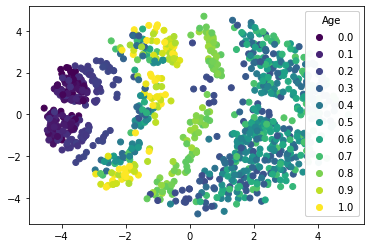

In [42]:
# Gráfico de duas dimensões resultante do escalonamento
idade_max = max(amostra.Age)
fig, ax = plt.subplots()
scatter = ax.scatter(escalonado[:,0],escalonado[:,1], c=amostra.Age)
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)
# Para melhorar a legenda pode-se multiplicar os valores pela idade máxima da amostra

In [43]:
# Agora vamos repetir o processo, usando a métrica de distância cityblock
dist = squareform(pdist(amostra,'cityblock'))
escalonado = mds.fit_transform(dist)

it: 0, stress 507279437.53793424
it: 1, stress 124748300.10793906
it: 2, stress 121735993.02741016
it: 3, stress 119558281.16198733
it: 4, stress 117855216.69408795
it: 5, stress 116466043.70273429
it: 6, stress 115277515.56746513
it: 7, stress 114254876.28804567
it: 8, stress 113362009.88181712
it: 9, stress 112571675.03007042
it: 10, stress 111836565.88040599
it: 11, stress 111092252.15172416
it: 12, stress 110260590.83711864
it: 13, stress 109276321.4922695
it: 14, stress 108068525.06536467
it: 15, stress 106559155.91714247
it: 16, stress 104652033.00163963
it: 17, stress 102257885.43581541
it: 18, stress 99287951.03706174
it: 19, stress 95718219.39457327
it: 20, stress 91549826.45568274
it: 21, stress 86867847.32637757
it: 22, stress 81675144.39447924
it: 23, stress 75998672.2184633
it: 24, stress 69942293.09674428
it: 25, stress 63902908.47722167
it: 26, stress 58520790.38455253
it: 27, stress 54179094.39761977
it: 28, stress 50970126.50629437
it: 29, stress 48624204.69206766
it: 

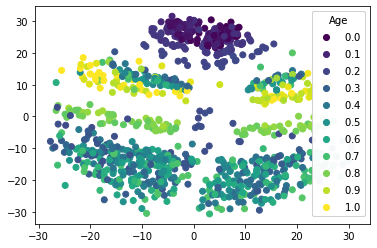

In [44]:
# Plotando gráfico 2d após escalonamento
fig, ax = plt.subplots()
scatter = ax.scatter(escalonado[:,0],escalonado[:,1], c=amostra.Age)
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)

Coisas que poderiam ser diferente nesse processamento:
* Tratamento dos valores ausentes
* Cálculo da distância
* Otimizador usado no escalonamento


## 6 - Análise de correlações dos nomes populares no Brasil
O Instituto Brasileiro de Geografia e Estatística (IBGE) publicou uma base de dados com o primeiro nome dos moradores do Brasil colhidos no censo de 2010. A base de dados permite a consulta por década de nascimento e por localidade. Vamos analisar os nomes mais populares de acordo com a década de nascimento.

O IBGE desconsiderou acentos, de maneira Antônio e Antonio são catabilizados como o mesmo nome. Além disso, devido à politica de privacidade, somente aparecem na base nomes cuja contagem é pelo menos 20, e todos os nomes são convertidos para caixa alta (letras maiúsculas). Dessa maneira, não estão contabilizados todos os habitatens, uma vez que a contagem de nomes muito raros não foram disponilizados. O arquivo nomes-decada-ibge.csv contém os nomes dos residentes do Brasil de acordo com o censo de 2010, separados por década de nascimento. Na primeira coluna temos o primeiro nome, seguido do número de pessoas com aquele primeiro nome contabilizada no censo. Vamos abrir esse arquivo com o pandas, usando a primeira coluna como índice. 

O que vamos fazer 

In [45]:
# Carregando a base de dados
nomes = pd.read_csv('https://drive.google.com/u/3/uc?id=1r9UbPXPSwKeNbCbkGHJNLKVvle_Hqfkf&export=download',index_col='Nome')

In [46]:
# Nome das colunas
nomes.columns

Index(['ate1930', 'ate1940', 'ate1950', 'ate1960', 'ate1970', 'ate1980',
       'ate1990', 'ate2000', 'ate2010'],
      dtype='object')

In [49]:
# Amostra da tabela
nomes.sample(10)

,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
Nome,,,,,,,,,
WILSON,1784.0,6593.0,16135.0,33983.0,43495.0,37977.0,26649.0,15717.0,6467.0
GEORDAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN
SHAMYRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
UELER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
TUPINAMBA,NaN,NaN,NaN,NaN,22.0,23.0,NaN,NaN,NaN
ADILEUSA,NaN,NaN,NaN,27.0,76.0,121.0,63.0,NaN,NaN
JUDIVANIA,NaN,NaN,NaN,NaN,NaN,26.0,30.0,22.0,NaN
JILCIANE,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN
JHON,NaN,NaN,NaN,42.0,162.0,444.0,2540.0,9650.0,6534.0


In [50]:
# Vendo dados do nome Wesley
nomes.loc['WESLEY']

ate1930        NaN
ate1940       30.0
ate1950       67.0
ate1960      232.0
ate1970     1254.0
ate1980     7762.0
ate1990    30436.0
ate2000    64390.0
ate2010    53017.0
Name: WESLEY, dtype: float64

### 6.1 - Escalonamento das Décadas

In [51]:
# Calculando a matriz de correlação entre as décadas
corre_mat = nomes.corr()
corre_mat

,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
ate1930,1.000000,0.996113,0.991919,0.984082,0.963575,0.870402,0.657785,0.456437,0.600890
ate1940,0.996113,1.000000,0.998060,0.991133,0.973051,0.878698,0.663101,0.458982,0.590795
ate1950,0.991919,0.998060,1.000000,0.996747,0.981963,0.889518,0.668770,0.458337,0.584092
ate1960,0.984082,0.991133,0.996747,1.000000,0.991187,0.904537,0.683194,0.466649,0.587236
ate1970,0.963575,0.973051,0.981963,0.991187,1.000000,0.943627,0.735187,0.504737,0.603655
ate1980,0.870402,0.878698,0.889518,0.904537,0.943627,1.000000,0.872836,0.606589,0.628741
ate1990,0.657785,0.663101,0.668770,0.683194,0.735187,0.872836,1.000000,0.828855,0.706303
ate2000,0.456437,0.458982,0.458337,0.466649,0.504737,0.606589,0.828855,1.000000,0.850446
ate2010,0.600890,0.590795,0.584092,0.587236,0.603655,0.628741,0.706303,0.850446,1.000000


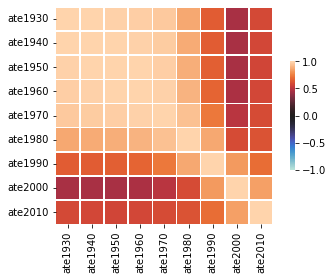

In [72]:
# Representando a matriz de correlação calculada através de heatmap
from matplotlib import cm
sns.heatmap(corre_mat, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
# Abaixo usamos o escalonamento multidimensional
# Assim podemos identificar quais décadas foram mais semelhantes
# Fazemos 1-corre_mat pois a matriz de correlação calcula similaridade e a técnica mds precisa de distância
transformed = mds.fit_transform(1-corre_mat)

it: 0, stress 5.238425839800985
it: 1, stress 1.5101058598505586
it: 2, stress 1.2511615180938738
it: 3, stress 0.43842023811413866
it: 4, stress 0.17681135833095535
it: 5, stress 0.0953108350868921
it: 6, stress 0.058618397352664824
it: 7, stress 0.04068214619739276
it: 8, stress 0.031909062952976824
it: 9, stress 0.027156797244318628
it: 10, stress 0.024352437450332602
it: 11, stress 0.022589949355153946
it: 12, stress 0.021433881100987626
breaking at iteration 12 with stress 0.021433881100987626
it: 0, stress 9.934022032381302
it: 1, stress 1.1709185166774407
it: 2, stress 0.8109134856451783
it: 3, stress 0.43055030882742834
it: 4, stress 0.062342733025468326
it: 5, stress 0.031836060295221374
it: 6, stress 0.025207126248047544
it: 7, stress 0.02231556149760414
it: 8, stress 0.020827202806590433
breaking at iteration 8 with stress 0.020827202806590433
it: 0, stress 11.010727950850868
it: 1, stress 0.7046060339009551
it: 2, stress 0.4523434706605697
it: 3, stress 0.4165860523058237
i

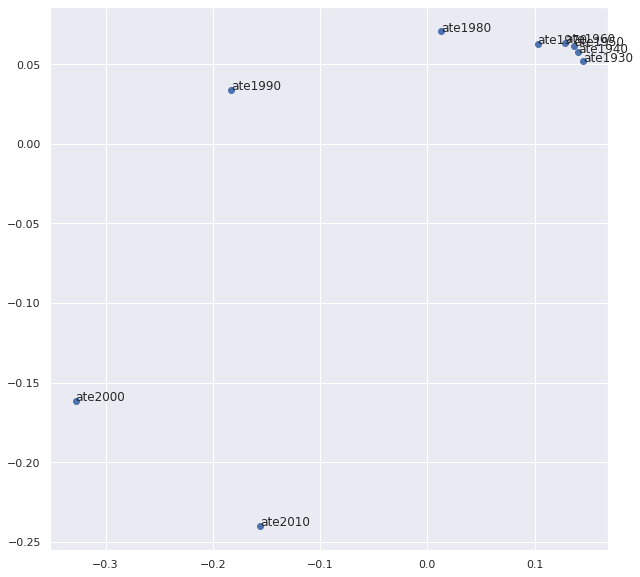

In [78]:
# Plotando graficamente o resultado do escalonamento multidimensional
fig = plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0],transformed[:,1])
for i in range(len(transformed)):
  plt.text(transformed[i,0],transformed[i,1],corre_mat.columns[i])

### 6.2 - Escalonamento dos nomes

In [62]:
# Pegando amostra apenas dos 50 nomes mais populares
top50 = nomes.sum(axis=1).sort_values(ascending=False).head(50)

In [64]:
# Visualizando o top 50
top50

Nome
MARIA        11734129.0
JOSE          5754529.0
ANA           3089858.0
JOAO          2984119.0
ANTONIO       2576348.0
FRANCISCO     1772197.0
CARLOS        1489191.0
PAULO         1423262.0
PEDRO         1219605.0
LUCAS         1127310.0
LUIZ          1107792.0
MARCOS        1106165.0
LUIS           935905.0
GABRIEL        932449.0
RAFAEL         821638.0
FRANCISCA      725642.0
DANIEL         711338.0
MARCELO        693215.0
BRUNO          668217.0
EDUARDO        632664.0
FELIPE         621460.0
RAIMUNDO       613361.0
RODRIGO        601650.0
ANTONIA        592815.0
MANOEL         592345.0
MATEUS         588819.0
ANDRE          583808.0
ADRIANA        567968.0
JULIANA        564706.0
FERNANDO       556346.0
MARCIA         553706.0
FABIO          547965.0
LEONARDO       547601.0
GUSTAVO        541480.0
FERNANDA       534757.0
PATRICIA       531065.0
GUILHERME      529001.0
ALINE          511737.0
LEANDRO        509248.0
TIAGO          495211.0
SANDRA         480379.0
ANDERSON   

In [65]:
# Selecionando apenas as linhas do dataframe onde o índice é algum dos top50
nomes50 = nomes.loc[top50.index].T

In [67]:
# Calculando correlação dos nomes
corr_mat = nomes50.corr()
corr_mat

Nome,MARIA,JOSE,ANA,JOAO,ANTONIO,FRANCISCO,CARLOS,PAULO,PEDRO,LUCAS,LUIZ,MARCOS,LUIS,GABRIEL,RAFAEL,FRANCISCA,DANIEL,MARCELO,BRUNO,EDUARDO,FELIPE,RAIMUNDO,RODRIGO,ANTONIA,MANOEL,MATEUS,ANDRE,ADRIANA,JULIANA,FERNANDO,MARCIA,FABIO,LEONARDO,GUSTAVO,FERNANDA,PATRICIA,GUILHERME,ALINE,LEANDRO,TIAGO,SANDRA,ANDERSON,CAMILA,RICARDO,MARCIO,AMANDA,JORGE,BRUNA,SEBASTIAO,JESSICA
Nome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MARIA,1.000000,0.925726,-0.075786,0.340812,0.922793,0.709731,0.379704,0.441987,0.058921,-0.369417,0.591811,-0.013705,0.424025,-0.255163,-0.439355,0.804287,-0.297027,-0.038939,-0.448574,-0.178443,-0.412546,0.891934,-0.374706,0.820465,0.882710,-0.303519,-0.238821,-0.023503,-0.398761,-0.094129,0.378245,-0.189727,-0.406843,-0.266655,-0.395353,-0.213015,-0.295740,-0.438445,-0.365375,-0.420499,0.509578,-0.362013,-0.451965,0.007007,0.077372,-0.409517,0.880025,-0.437322,0.887995,-0.407001
JOSE,0.925726,1.000000,-0.056430,0.187070,0.995943,0.902197,0.515471,0.660315,-0.108354,-0.387403,0.620472,0.210977,0.476553,-0.383939,-0.275071,0.957823,-0.174316,0.263853,-0.312460,-0.111448,-0.366522,0.974272,-0.109990,0.966502,0.872730,-0.393069,0.029474,0.276949,-0.155731,0.192127,0.638099,0.106973,-0.276778,-0.363986,-0.175003,0.114567,-0.378340,-0.204865,-0.096262,-0.249840,0.732105,-0.087066,-0.321813,0.303907,0.365907,-0.373075,0.969886,-0.345167,0.824068,-0.263318
ANA,-0.075786,-0.056430,1.000000,0.822174,-0.119379,0.231467,0.787336,0.582123,0.864916,0.797006,0.717949,0.810281,0.833194,0.856951,0.741161,-0.123246,0.918184,0.528545,0.743181,0.986811,0.820452,-0.254248,0.622212,-0.084936,-0.468702,0.842256,0.708621,0.350818,0.650085,0.629945,0.235212,0.516794,0.814998,0.906891,0.735507,0.471259,0.886402,0.605048,0.583985,0.722365,0.160875,0.638804,0.751296,0.590284,0.385699,0.804146,0.060339,0.699050,-0.495948,0.429071
JOAO,0.340812,0.187070,0.822174,1.000000,0.128213,0.244881,0.668060,0.434250,0.955286,0.649194,0.814052,0.462287,0.830975,0.814168,0.376174,0.004672,0.596272,0.098141,0.417294,0.734270,0.586123,-0.012447,0.153923,0.047425,-0.102076,0.762443,0.246213,-0.072550,0.201510,0.231019,0.023859,0.046403,0.489962,0.812227,0.302133,-0.022009,0.785789,0.187192,0.119493,0.338109,0.038492,0.161565,0.428071,0.185085,0.004416,0.586291,0.265893,0.444376,-0.060633,0.190863
ANTONIO,0.922793,0.995943,-0.119379,0.128213,1.000000,0.884081,0.456606,0.614147,-0.167567,-0.446218,0.561812,0.158196,0.410027,-0.442792,-0.317468,0.968335,-0.229064,0.240462,-0.359711,-0.172030,-0.422322,0.986788,-0.135178,0.974183,0.904747,-0.453293,-0.002151,0.271736,-0.184397,0.160014,0.617631,0.093459,-0.328727,-0.422887,-0.211428,0.101408,-0.438330,-0.236729,-0.118661,-0.285095,0.713760,-0.114464,-0.369415,0.274379,0.354684,-0.429470,0.950858,-0.396127,0.855056,-0.302650
FRANCISCO,0.709731,0.902197,0.231467,0.244881,0.884081,1.000000,0.762325,0.897519,-0.009838,-0.152394,0.741280,0.573619,0.664812,-0.220518,0.114670,0.922979,0.203692,0.618743,0.048117,0.221817,-0.063230,0.837290,0.319450,0.932873,0.619133,-0.203948,0.452114,0.582136,0.269753,0.592647,0.812060,0.504768,0.085992,-0.159071,0.250037,0.511861,-0.166853,0.200161,0.328580,0.151971,0.839939,0.345171,0.037726,0.671782,0.657869,-0.085982,0.923318,-0.043190,0.525896,-0.013758
CARLOS,0.379704,0.515471,0.787336,0.668060,0.456606,0.762325,1.000000,0.944703,0.539906,0.390917,0.917245,0.892102,0.954640,0.404849,0.517045,0.471658,0.700612,0.738872,0.473851,0.767582,0.459122,0.348481,0.577488,0.504918,0.052668,0.398332,0.731026,0.600621,0.561786,0.762257,0.703093,0.645354,0.548179,0.477200,0.605996,0.614972,0.452709,0.480881,0.559015,0.535178,0.674173,0.605171,0.473258,0.807640,0.678020,0.433907,0.615079,0.385797,-0.025838,0.222378
PAULO,0.441987,0.660315,0.582123,0.434250,0.614147,0.897519,0.944703,1.000000,0.264124,0.212808,0.845970,0.863280,0.855417,0.134200,0.436002,0.665364,0.565084,0.808063,0.385850,0.590077,0.305132,0.531064,0.575111,0.687130,0.227053,0.161408,0.723760,0.706307,0.539332,0.795280,0.

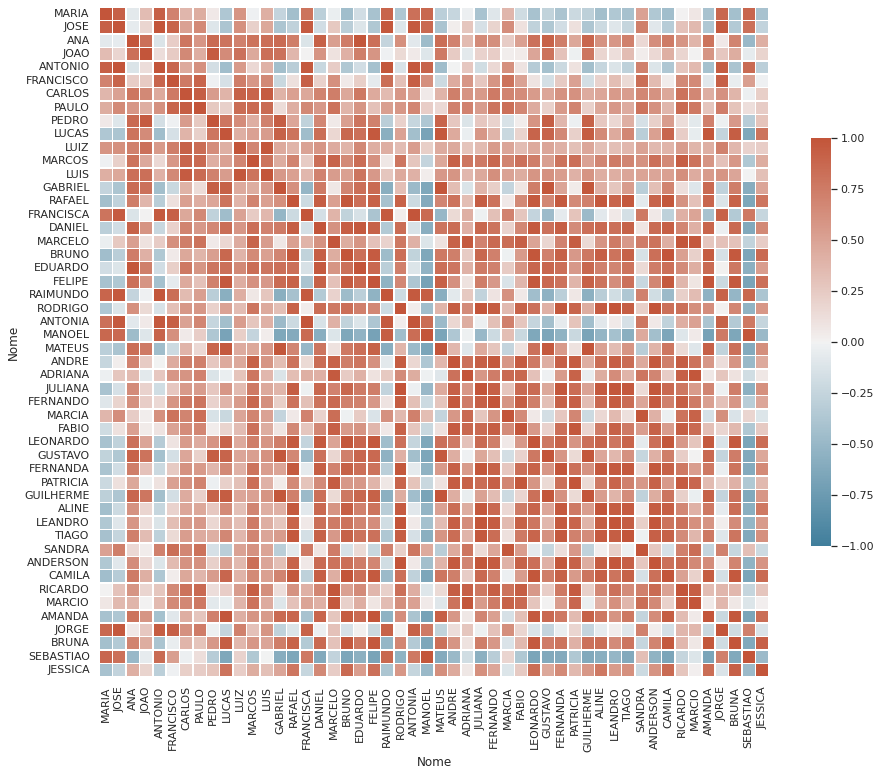

In [76]:
# Apresentando de maneira gráfica a correlação dos nomes
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr_mat, cmap = cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
# Realizando escalonamento multidimensional para encontrar similaridade de característica entre nomes
transformed = mds.fit_transform(1-corr_mat)

it: 0, stress 322.8323721311591
it: 1, stress 237.3806272557416
it: 2, stress 202.32500823219488
it: 3, stress 188.8839087973104
it: 4, stress 174.73112660730243
it: 5, stress 157.83519225979143
it: 6, stress 142.16522342741195
it: 7, stress 124.57447811953189
it: 8, stress 107.8916304926941
it: 9, stress 95.56820153954669
it: 10, stress 84.03058516116928
it: 11, stress 72.95884823529443
it: 12, stress 62.64860352151679
it: 13, stress 53.51034895225476
it: 14, stress 45.94507625539592
it: 15, stress 40.01955191888683
it: 16, stress 35.55483265568843
it: 17, stress 32.27321444269021
it: 18, stress 29.887569747389733
it: 19, stress 28.155818993071925
it: 20, stress 26.90001456952083
it: 21, stress 25.98889778773856
it: 22, stress 25.324070892318954
it: 23, stress 24.832637187107267
it: 24, stress 24.460182146877628
it: 25, stress 24.1649319005732
it: 26, stress 23.912814147357032
it: 27, stress 23.669527937130965
it: 28, stress 23.389710166657117
it: 29, stress 23.08191585420377
it: 30, 

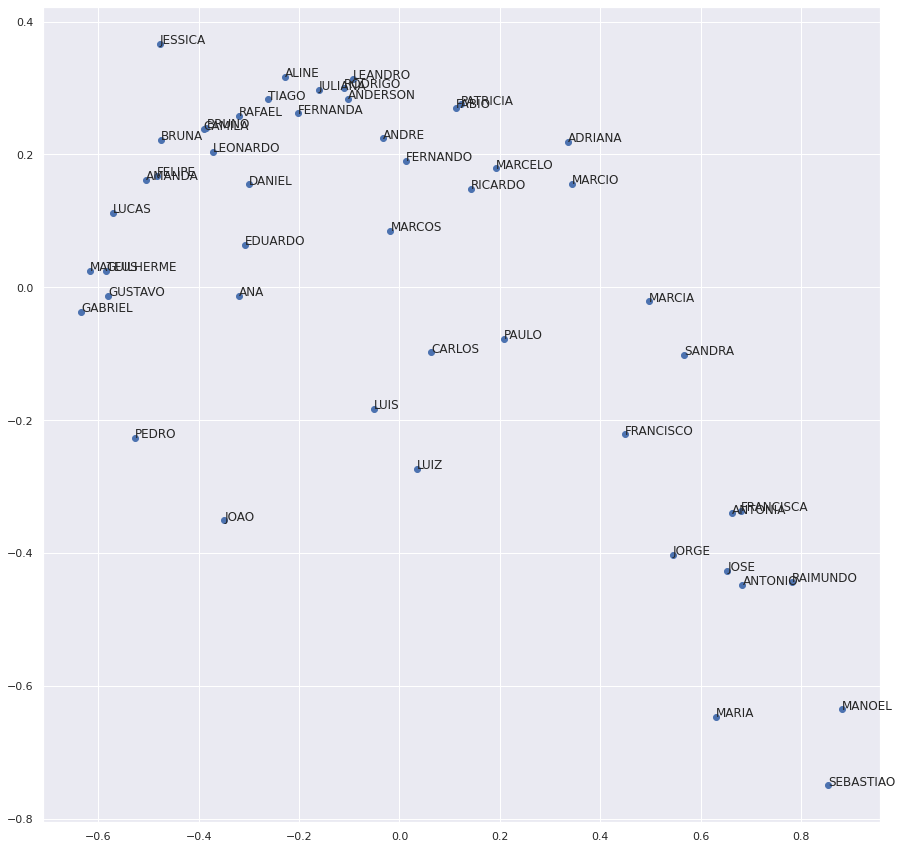

In [82]:
# Plotando o resultado da transformação acima
plt.scatter(transformed[:,0],transformed[:,1])
for i in range(len(transformed)):
  plt.text(transformed[i,0],transformed[i,1],top50.index[i])